# Notebook thể hiện quá trình tạo dữ liệu spectrogram để chuẩn bị input cho mô hình CNN.

>[Xử lý dữ liệu EEG để phân loại trạng thái tinh thần](#scrollTo=EElF0a6gtMG8)

>>[1. Giới thiệu](#scrollTo=EElF0a6gtMG8)

>>[2. Mục tiêu](#scrollTo=EElF0a6gtMG8)

>>[3. Phương pháp](#scrollTo=EElF0a6gtMG8)

>>>[3.1 Tổ chức dữ liệu](#scrollTo=EElF0a6gtMG8)

>>>[3.2 Xử lý tín hiệu](#scrollTo=EElF0a6gtMG8)

>>>[3.3 Tạo phổ đồ](#scrollTo=EElF0a6gtMG8)

>>>[3.4 Quy trình làm việc mô-đun](#scrollTo=EElF0a6gtMG8)

>>>[3.5 Tích hợp đầu ra](#scrollTo=EElF0a6gtMG8)

>>[4. Kết quả](#scrollTo=EElF0a6gtMG8)

>>[5. Thảo luận](#scrollTo=EElF0a6gtMG8)



# Pipeline

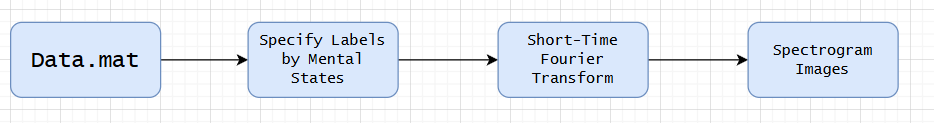

In [ ]:

!kaggle datasets download inancigdem/eeg-data-for-mental-attention-state-detection


Dataset URL: https://www.kaggle.com/datasets/inancigdem/eeg-data-for-mental-attention-state-detection
License(s): copyright-authors
100%|███████████████████████████████████████▉| 556M/557M [00:23<00:00, 20.9MB/s]
100%|████████████████████████████████████████| 557M/557M [00:23<00:00, 25.2MB/s]
Archive:  /kaggle/working/eeg-data-for-mental-attention-state-detection.zip
  inflating: EEG Data/eeg_record1.mat  
  inflating: EEG Data/eeg_record10.mat  
  inflating: EEG Data/eeg_record11.mat  
  inflating: EEG Data/eeg_record12.mat  
  inflating: EEG Data/eeg_record13.mat  
  inflating: EEG Data/eeg_record14.mat  
  inflating: EEG Data/eeg_record15.mat  
  inflating: EEG Data/eeg_record16.mat  
  inflating: EEG Data/eeg_record17.mat  
  inflating: EEG Data/eeg_record18.mat  
  inflating: EEG Data/eeg_record19.mat  
  inflating: EEG Data/eeg_record2.mat  
  inflating: EEG Data/eeg_record20.mat  
  inflating: EEG Data/eeg_record21.mat  
  inflating: EEG Data/eeg_record22.mat  
  inflating: EEG 

In [ ]:
!unzip "/kaggle/working/eeg-data-for-mental-attention-state-detection.zip"

Archive:  /kaggle/working/eeg-data-for-mental-attention-state-detection.zip
  inflating: EEG Data/eeg_record1.mat  
  inflating: EEG Data/eeg_record10.mat  
  inflating: EEG Data/eeg_record11.mat  
  inflating: EEG Data/eeg_record12.mat  
  inflating: EEG Data/eeg_record13.mat  
  inflating: EEG Data/eeg_record14.mat  
  inflating: EEG Data/eeg_record15.mat  
  inflating: EEG Data/eeg_record16.mat  
  inflating: EEG Data/eeg_record17.mat  
  inflating: EEG Data/eeg_record18.mat  
  inflating: EEG Data/eeg_record19.mat  
  inflating: EEG Data/eeg_record2.mat  
  inflating: EEG Data/eeg_record20.mat  
  inflating: EEG Data/eeg_record21.mat  
  inflating: EEG Data/eeg_record22.mat  
  inflating: EEG Data/eeg_record23.mat  
  inflating: EEG Data/eeg_record24.mat  
  inflating: EEG Data/eeg_record25.mat  
  inflating: EEG Data/eeg_record26.mat  
  inflating: EEG Data/eeg_record27.mat  
  inflating: EEG Data/eeg_record28.mat  
  inflating: EEG Data/eeg_record29.mat  
  inflating: EEG Data/ee

# **Xử lý dữ liệu EEG để phân loại trạng thái tinh thần**

## **1. Giới thiệu**
Điện não đồ (EEG) là một phương pháp phổ biến để theo dõi hoạt động não bộ, cung cấp thông tin hữu ích về các trạng thái nhận thức như tập trung, mất tập trung và buồn ngủ. Nghiên cứu này đề xuất một quy trình xử lý dữ liệu EEG, bao gồm tiền xử lý, trích xuất đặc trưng và tổ chức dữ liệu nhằm phục vụ cho các mô hình học máy phân loại trạng thái tinh thần. Quy trình được thiết kế để xử lý tín hiệu EEG thô, phân đoạn theo trạng thái tinh thần và tạo ra phổ đồ (spectrogram) để phân tích ở miền tần số.

---

## **2. Mục tiêu**
Hệ thống được xây dựng nhằm:
1. Trích xuất dữ liệu từ các tệp `.mat` và tiền xử lý cho các bước phân tích tiếp theo.
2. Phân đoạn tín hiệu EEG theo các trạng thái tinh thần xác định trước (Tập trung, Mất tập trung, Buồn ngủ) dựa trên khoảng thời gian.
3. Tạo phổ đồ để trích xuất đặc trưng ở miền tần số và phục vụ học máy.
4. Tổ chức dữ liệu đầu ra theo cấu trúc rõ ràng, thuận tiện cho phân tích và mô hình hóa.

---

## **3. Phương pháp**

### **3.1 Tổ chức dữ liệu**
- **Dữ liệu đầu vào:**
  - Bộ dữ liệu gồm các tệp `.mat` chứa tín hiệu EEG đa kênh, được ghi với tần số lấy mẫu 128 Hz.
  - Mỗi tệp chứa tín hiệu EEG tương ứng với ba trạng thái tinh thần:
    - **Tập trung:** 0–76800 mẫu.
    - **Mất tập trung:** 76801–153600 mẫu.
    - **Buồn ngủ:** 153601–230400 mẫu.

- **Dữ liệu đầu ra:**
  - Tín hiệu được xuất ra dưới dạng tệp `.csv`, phân đoạn theo trạng thái tinh thần.
  - Phổ đồ của từng kênh và đoạn tín hiệu được lưu dưới dạng hình ảnh để phân tích trực quan hoặc làm đầu vào cho mô hình học máy.

---

### **3.2 Xử lý tín hiệu**
1. **Tiền xử lý:**
   - Trích xuất các kênh EEG quan trọng (ví dụ: kênh 4, 5, 8, 9, 10, 11, 16).
   - Phân đoạn tín hiệu theo các khoảng thời gian xác định tương ứng với trạng thái tinh thần.

2. **Phân đoạn dữ liệu:**
   - Phân đoạn tín hiệu theo chỉ số thời gian và lưu trữ từng đoạn dưới dạng tệp `.csv`.
   - Dữ liệu được tổ chức theo tệp gốc, kênh và trạng thái để dễ dàng truy xuất.

---

### **3.3 Tạo phổ đồ**
- **Trích xuất đặc trưng:**
  - Sử dụng phép biến đổi Fourier ngắn hạn (STFT) để tạo phổ đồ.
  - Áp dụng window Tukey với độ overlap 90% để đảm bảo độ phân giải thời gian-tần số cao.
  - Phổ đồ được lưu dưới dạng biểu đồ nhiệt, thể hiện phân bố năng lượng theo thời gian và tần số.

- **Cửa sổ trượt:**
  - Để xử lý tập dữ liệu lớn, sử dụng cơ chế cửa sổ trượt (256 mẫu với độ chồng lấp 50%) để phân tích chi tiết sự biến đổi của tần số theo thời gian.

---

### **3.4 WorkFlow**
- Quy trình được chia thành các thành phần độc lập:
  - Tải dữ liệu, phân đoạn và lưu trữ.
  - Tính toán và trực quan hóa phổ đồ.
  - Quản lý thư mục và đầu ra.

---

### **3.5 Tích hợp đầu ra**
- Dữ liệu đầu ra được tổ chức nhằm:
  - Trực quan hóa phổ đồ để phân tích sơ bộ.
  - Tích hợp dễ dàng với các mô hình học máy phục vụ phân loại trạng thái tinh thần.

---

## **4. Kết quả**
Hệ thống tạo ra:
1. **Dữ liệu phân đoạn:**
   - Tín hiệu EEG được phân phối thành các ảnh Spectrogramn theo các trạng thái tinh thần và lưu dưới dạng tệp `.csv`.
2. **Phổ đồ:**
   - Đại diện thời gian-tần số của tín hiệu EEG cho từng kênh và đoạn tín hiệu, lưu dưới dạng hình ảnh.
3. **Thư mục tổ chức:**
   - Dữ liệu đầu ra được tổ chức có hệ thống, dễ dàng truy cập và xử lý thêm.

---

## **5. Thảo luận**
- **Ưu điểm:**
  - Thiết kế mô-đun giúp tái sử dụng và mở rộng quy trình cho các bộ dữ liệu tương tự.
  - Việc sử dụng phổ đồ cung cấp thông tin đặc trưng ở miền tần số, quan trọng cho phân loại trạng thái tinh thần.
  
- **Hạn chế:**
  - Quy trình giả định chỉ số kênh và phạm vi mẫu cố định, cần tùy chỉnh cho các bộ dữ liệu kháng vững chắc cho các ứng dụng học máy trong nhận diện trạng thái tinh thần dựa trên tín hiệu EEG.


**STFT (Short-Time Fourier Transform)**:
STFT là một kỹ thuật phân tích tín hiệu phổ biến, cho phép phân tích tần số của một tín hiệu theo thời gian. Nó thực hiện bằng cách chia tín hiệu thành các khung nhỏ hơn, sau đó thực hiện biến đổi Fourier riêng lẻ trên mỗi khung. Điều này cho phép xem sự thay đổi của thành phần tần số theo thời gian.
Quy trình tạo STFT bao gồm các bước sau:

- Chia tín hiệu đầu vào thành các khung nhỏ hơn, thường sử dụng một cửa sổ trượt.
- Ở đây ta áp dụng hàm cửa sổ blackman lên mỗi khung để giảm rò rỉ tần số.
Thực hiện biến đổi Fourier trên mỗi khung để tính toán phổ của nó.
Kết hợp các phổ khung lại với nhau để tạo ra biểu đồ STFT, thường được hiển thị dưới dạng một đồ thị nhiệt với trục tần số và trục thời gian.

**Spectrogram**:
Spectrogram là một biểu đồ trực quan hóa phổ tần số của một tín hiệu theo thời gian. Nó được tạo bằng cách sử dụng STFT, nhưng thay vì hiển thị các phổ khung riêng lẻ, nó được biểu diễn dưới dạng một hình ảnh, trong đó cường độ màu biểu thị độ lớn của các thành phần tần số tại một thời điểm nhất định.
Quá trình tạo spectrogram bao gồm các bước sau:

- Tính toán STFT của tín hiệu đầu vào.
- Biểu diễn độ lớn của các thành phần tần số trong mỗi khung STFT bằng cách sử dụng một bản đồ màu, thường là một thang màu xanh-trắng-đỏ.
- Ghép các phổ khung lại với nhau để tạo ra một hình ảnh spectrogram, với trục ngang là thời gian và trục dọc là tần số.

Spectrogram cung cấp một cách trực quan để hiểu rõ hơn về cấu trúc tần số của một tín hiệu theo thời gian. Có thể được sử dụng trong các ứng dụng như phân tích âm thanh, xử lý giọng nói và nhận dạng mẫu.

In [ ]:
import os
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy import signal
import glob
from typing import List, Dict, Optional, Any

In [ ]:
class EEGDataProcessor:
    def __init__(self, data_path: str = 'data'):
        self.CWD = os.getcwd()
        self.DATA_FILES_PATH = os.path.join(self.CWD, '/kaggle/working/EEG Data')
        self.STATE_DATA_OUTPUT = os.path.join(self.CWD, 'state-data')

        # Constants
        self.CHANNELS = [4, 5, 8, 9, 10, 11, 16]
        self.MAT = '.mat'
        self.FREQUENCY = 128
        self.M = 64
        self.MAX_AMP = 2

        # Mental state data ranges
        self.MENTAL_STATES = {
            'FOCUSED': [0, 76801],
            'UNFOCUSED': [76801, 153600],
            'DROWSY': [153601, 230400]
        }

    def get_all_data_files(self) -> List[str]:
        """Get all .mat files in the specified directory."""
        all_files = []
        for dirname, _, filenames in os.walk(self.DATA_FILES_PATH):
            all_files.extend([
                os.path.join(dirname, filename)
                for filename in filenames if self.MAT in filename
            ])
        return all_files

    def load_data_from_file(self, path_to_file: str) -> np.ndarray:
        """Load data from a .mat file."""
        raw_file = scipy.io.loadmat(path_to_file)
        raw_data = raw_file['o'][0, 0]
        return raw_data[6]

    def create_output_directory(self, output_path: str) -> None:
        """Create or recreate an output directory."""
        import shutil

        if os.path.isdir(output_path):
            shutil.rmtree(output_path, ignore_errors=True)

        os.makedirs(output_path)

    def output_data_to_csv(self, output_dir: str, data: np.ndarray,
                            state: List[int], filename: str) -> None:
        """Output specific state data to a CSV file."""
        output_path = os.path.join(output_dir, filename)

        try:
            parsed_data = np.array(data[range(state[0], state[1])])
        except IndexError:
            print(f'Error processing file: {output_path}')
            return

        np.savetxt(output_path, parsed_data, delimiter=',')

    def split_data(self, input_files: Optional[List[str]] = None) -> Dict[str, List[str]]:
        """Split data by mental state and output to CSV."""
        # Use all files if not specified
        input_files = input_files or self.get_all_data_files()

        # Create output directory for split data
        self.create_output_directory(self.STATE_DATA_OUTPUT)

        processed_files = []
        for data_file in input_files:
            # Load data from file
            data = self.load_data_from_file(data_file)

            # Generate output basename
            output_basename = os.path.basename(data_file).split('.')[0]
            output_dirpath = os.path.join(self.STATE_DATA_OUTPUT, output_basename)

            # Create directory for this data file
            os.makedirs(output_dirpath, exist_ok=True)

            for channel in self.CHANNELS:
                channel_dir = os.path.join(output_dirpath, str(channel))
                os.makedirs(channel_dir, exist_ok=True)

                # Output data for each mental state
                for state_name, state_range in self.MENTAL_STATES.items():
                    self.output_data_to_csv(
                        channel_dir,
                        data[:, channel],
                        state_range,
                        state_name
                    )

            processed_files.append(data_file)

        return {'processed_files': processed_files}

    def generate_spectrogram(self, data: np.ndarray,
                              fs: int = None,
                              m: int = None,
                              output_filepath: Optional[str] = None) -> Optional[tuple]:
        """Generate spectrogram from data."""
        fs = fs or self.FREQUENCY
        m = m or self.M

        overlap = math.floor(m * 0.9)

        f, t, Sxx = signal.spectrogram(
            data,
            fs,
            noverlap=overlap,
            window=signal.get_window(('tukey', 0.25), m)
        )

        try:
            plt.figure(figsize=(10, 6))
            plt.pcolormesh(t, f, np.log10(Sxx + 1e-8), cmap='jet')
            plt.axis('off')

            if output_filepath:
                plt.savefig(output_filepath, bbox_inches='tight', pad_inches=0, dpi=35)
                plt.close()

            return f, t, Sxx

        except FloatingPointError:
            print(f'Error generating spectrogram: {output_filepath}')
            return None

    def iterate_data(self, data: np.ndarray,
                     output_file: Optional[str] = None,
                     fs: int = None,
                     m: int = None) -> List[Dict[str, Any]]:
        """Iterate through data and generate spectrograms."""
        fs = fs or self.FREQUENCY
        m = m or self.M

        move = 64*2
        i, j = 0, 64*4
        counter = 1
        spectrogram_details = []

        while j < len(data):
            sub_data = data[i:j]

            sub_output_file = f'{output_file}_{counter}' if output_file else None
            result = self.generate_spectrogram(sub_data, fs, m, sub_output_file)

            if result:
                spectrogram_details.append({
                    'start_index': i,
                    'end_index': j,
                    'frequency': result[0],
                    'time': result[1],
                    'spectrogram': result[2]
                })

            i += move
            j += move
            counter += 1

        return spectrogram_details

    def process_data(self,
                     input_files: Optional[List[str]] = None,
                     split_data: bool = True,
                     generate_spectrograms: bool = True) -> Dict[str, Any]:
        """Main processing function for EEG data."""
        # Default to all .mat files if not specified
        input_files = input_files or self.get_all_data_files()

        results = {
            'split_data': [],
            'spectrograms': []
        }

        if split_data:
            split_result = self.split_data(input_files)
            results['split_data'] = split_result.get('processed_files', [])

        if generate_spectrograms:
            for file in input_files:
                data = self.load_data_from_file(file)
                filename = os.path.basename(file).split('.')[0]
                output_dir = os.path.join(self.CWD, filename + '_spectrograms')
                os.makedirs(output_dir, exist_ok=True)

                file_spectrograms = []
                for channel in self.CHANNELS:
                    channel_data = data[:, channel]
                    channel_output = os.path.join(output_dir, f'channel_{channel}_spectrogram')

                    spectrograms = self.iterate_data(
                        channel_data,
                        output_file=channel_output
                    )
                    file_spectrograms.extend(spectrograms)

                results['spectrograms'].append({
                    'filename': filename,
                    'spectrograms': file_spectrograms
                })

        return results

# Example usage
def main():
    processor = EEGDataProcessor()
    split_results = processor.process_data(generate_spectrograms=False, split_data=True)

if __name__ == '__main__':
    main()

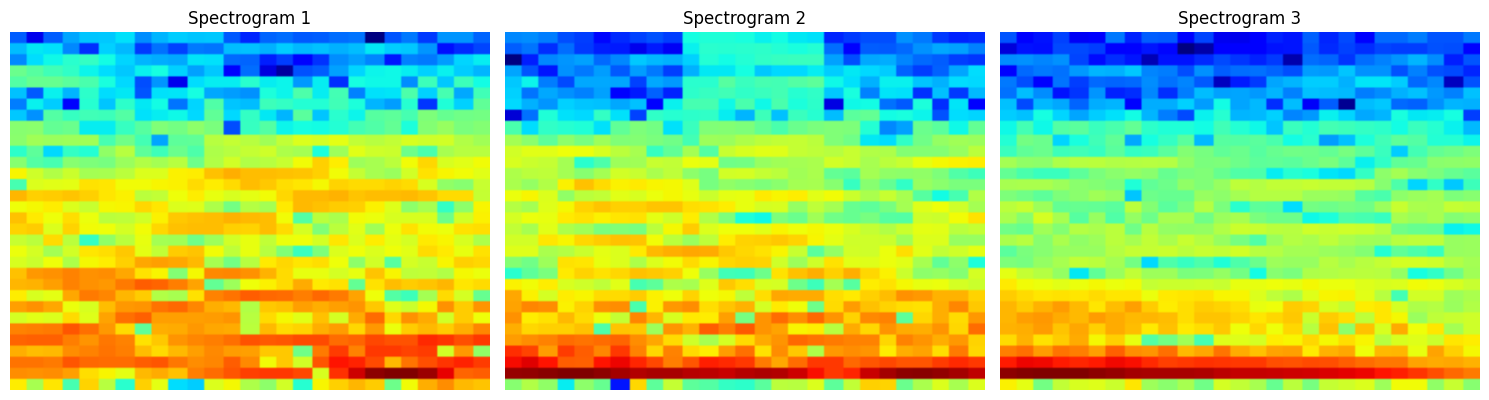

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Đường dẫn đến các ảnh phổ đồ
image_paths = [
    "/kaggle/working/DROWSY/eeg_record1/10/DROWSY_1.png",
    "/kaggle/working/FOCUSED/eeg_record1/10/FOCUSED_1.png",
    "/kaggle/working/UNFOCUSED/eeg_record1/10/UNFOCUSED_1.png"
]

# Hiển thị các ảnh phổ đồ
plt.figure(figsize=(15, 5))
for idx, image_path in enumerate(image_paths, 1):
    # Mở ảnh bằng Pillow
    img = Image.open(image_path)

    # Vẽ ảnh
    plt.subplot(1, len(image_paths), idx)
    plt.imshow(img)
    plt.axis('off')  # Tắt trục
    plt.title(f"Spectrogram {idx}")

plt.tight_layout()
plt.show()


Các ảnh Spectrogram này thể hiện các trạng thái tinh thần khác nhau của người sử dụng EEG:

- Phổ số 1 là khi người dùng ở trạng thái **buồn ngủ**.
- Phổ số 2 là khi người dùng ở trạng thái **tập trung**.
- Phổ số 3 là khi người dùng ở trạng thái **không tập trung**.

Những khác biệt trong các phổ này phản ánh sự thay đổi trong hoạt động não khi người dùng ở các trạng thái tinh thần khác nhau. Các phổ này được tạo ra bằng cách xử lý dữ liệu EEG và tính toán phổ tín hiệu qua thời gian.
Trên các ảnh, trục ngang biểu diễn thời gian, còn trục dọc biểu diễn tần số. Màu sắc trong các ảnh phổ thể hiện cường độ tín hiệu tại mỗi tần số và thời điểm: các vùng có màu xanh và lam biểu diễn cường độ tín hiệu thấp, còn các vùng màu vàng và đỏ biểu diễn cường độ tín hiệu cao. Khi so sánh 3 ảnh phổ ta có thể thấy:
  1. Ảnh phổ 1 (trạng thái buồn ngủ): Có nhiều vùng có cường độ tín hiệu cao ở các tần số thấp, điều này tương ứng với hoạt động não có xu hướng giảm, rơi vào trạng thái buồn ngủ.
  2. Ảnh phổ 2 (trạng thái tập trung): Phần lớn là các vùng có cường độ tín hiệu thấp, với ít vùng cường độ cao, phù hợp với sự tập trung cao độ của não.
  3. Ảnh phổ 3 (trạng thái không tập trung): Có sự kết hợp giữa các vùng cường độ cao và thấp, phản ánh sự biến động, không ổn định trong hoạt động não khi người dùng không tập trung.
Các Spectrogram trên cho thấy sự khác biệt về tần số dao động của tín hiệu EEG dựa trên 3 trạng thái đã phân loại. Những sự khác biệt này có thể biểu hiện thông qua tương quan hoạt động dao động của não ở các dãy tần theta, beta và alpha. Có thể được phân tích sơ bộ như sau:
*Sóng Theta*: Spectrogram cho trạng thái "buồn ngủ" cho thấy sự gia tăng công suất trong dải tần số theta. Hoạt động của dãy theta tăng cao liên quan đến trạng thái buồn ngủ và thiếu chú ý.
*Sóng Alpha*: Spectrogram cho trạng thái "tập trung" thể hiện sự giảm tương đối công suất alpha so với hai trạng thái còn lại. Hoạt động của dãy alpha thấp liên quan đến sự chú ý và tập trung cao độ.
*Sóng Beta*: Spectrogram cho trạng thái "không tập trung" thể hiện một mô hình biến động hơn, với cả công suất beta cao và thấp. Hoạt động beta không ổn định có thể chỉ ra sự thiếu tập trung và kiểm soát nhận thức.
Những sự phân biệt này trong miền tần số phản ánh trực tiếp các quá trình hoạt động thần kinh cơ bản. Dao động của các dãy theta, alpha và beta được biết đến với vai trò quan trọng trong các lĩnh vực phản hồi thần kinh (neurofeedback), giao diện não - máy tính (brain computer interface) và xử lý nhận thức.